In [1]:
import pandas as pd


In [1]:
input_data = pd.read_excel('income_data.xlsx')

NameError: name 'pd' is not defined

In [10]:
input_data.head()

,income,plot_size,owner
0,60.0,18.4,B
1,85.5,16.8,B
2,64.8,21.6,B
3,61.5,20.8,B
4,87.0,23.6,B


In [4]:
input_data.columns

Index(['income', 'plot_size', 'owner'], dtype='object')

In [11]:
x=input_data[['income', 'plot_size']]
x.head()

,income,plot_size
0,60.0,18.4
1,85.5,16.8
2,64.8,21.6
3,61.5,20.8
4,87.0,23.6


In [9]:
y=input_data['owner']
y

0      B
1      B
2      B
3      B
4      B
5      B
6      B
7      B
8      B
9      B
10     B
11     B
12    NB
13    NB
14    NB
15    NB
16    NB
17    NB
18    NB
19    NB
20    NB
21    NB
22    NB
23    NB
Name: owner, dtype: object

In [12]:
from sklearn import tree

In [13]:
ctree = tree.DecisionTreeClassifier()

In [14]:
ctree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
ctree.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

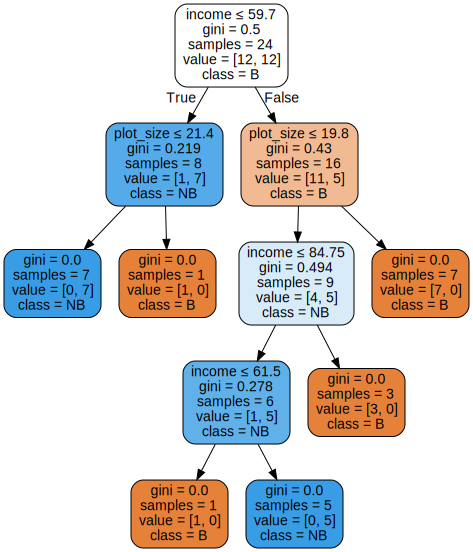

In [20]:
import graphviz
tree_data = tree.export_graphviz(ctree, out_file=None, 
                                 feature_names=x.columns, 
                                 class_names = ['B', 'NB'],
                                 filled=True,
                                 rounded=True,                                 
                                 special_characters=True
                                 )
graph = graphviz.Source(tree_data)
graph

In [18]:
y_pred = ctree.predict(x)
y_pred

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'NB',
       'NB', 'NB', 'NB', 'NB', 'NB', 'NB', 'NB', 'NB', 'NB', 'NB', 'NB'],
      dtype=object)

In [19]:
comp_df = x.copy()
comp_df['prediciton'] = y_pred
comp_df['actual'] = y

comp_df

,income,plot_size,prediciton,actual
0,60.0,18.4,B,B
1,85.5,16.8,B,B
2,64.8,21.6,B,B
3,61.5,20.8,B,B
4,87.0,23.6,B,B
5,110.1,19.2,B,B
6,108.0,17.6,B,B
7,82.8,22.4,B,B
8,69.0,20.0,B,B
9,93.0,20.8,B,B


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3)

In [29]:
x_test

,income,plot_size
2,64.8,21.6
8,69.0,20.0
19,66.0,18.4
23,63.0,14.8
11,81.0,20.0
1,85.5,16.8
22,51.0,14.0
14,64.8,17.2


In [39]:
from sklearn import tree
ctree = tree.DecisionTreeClassifier(max_depth=2)
ctree.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
y_test_pred = ctree.predict(x_test)

In [41]:
comp_df = x_test.copy()
comp_df['pred'] = y_test_pred
comp_df['actual'] = y_test
comp_df

,income,plot_size,pred,actual
2,64.8,21.6,B,B
8,69.0,20.0,B,B
19,66.0,18.4,B,NB
23,63.0,14.8,B,NB
11,81.0,20.0,B,B
1,85.5,16.8,B,B
22,51.0,14.0,NB,NB
14,64.8,17.2,B,NB


In [42]:
from sklearn import metrics

In [43]:
metrics.accuracy_score(y_test, y_test_pred )

0.625

In [44]:
y_train_pred = ctree.predict(x_train)
metrics.accuracy_score(y_train, y_train_pred)

0.875

In [38]:
comp_df = x_train.copy()
comp_df['pred'] = y_train_pred
comp_df['actual'] = y_train
comp_df

,income,plot_size,pred,actual
0,60.0,18.4,B,B
10,51.0,22.0,B,B
7,82.8,22.4,B,B
5,110.1,19.2,B,B
15,43.2,20.4,NB,NB
3,61.5,20.8,B,B
17,49.2,17.6,NB,NB
16,84.0,17.6,NB,NB
20,47.4,16.4,NB,NB
13,52.8,20.8,NB,NB
